<h1><center>Euler's Methods (A Family of Runge-Kutta Methods)</center></h1>

## (1) Forward Euler

The formula for the forward Euler method is given by Equation (8.2) in the lecture notes for week 8, as

\begin{equation*}
y_{i+1} = y_{i} + f(x_{i}, y_{i}) h
\label{eq:forwardMethod} \tag{1}
\end{equation*}

where $f(x_{i}, y_{i})$ is the differential equation evaluated at $x_i$ and $y_i$. 

The implementation of this equation in Matlab or Python is quite straightforward, because the calculation of $y_{i+1}$ requires known quantities that have been previously calculated, which is $y_{i}$. Because of the straightforward calculation, the forward Euler method is also referred to as the **explicit method**.

The first step is to solve for $y_{i+1}$ by directly implementing Equation $\eqref{eq:forwardMethod}$ above. We create a function to implement the forward method. The function takes in several input arguments to calculate $y_{i+1}$. The input arguments consist of the ODE(s) to be solved (we refer to it as `f`), initial condition(s) of the ODE(s) (`yinit`), the range of interval where the ODE(s) to be evaluated (`x_range`), and the step size (`h`). The function definition with these input arguments can be written as follows,

`def forwardEuler(f, yinit, x_range, h):`

We have to make the function as general as possible, and it includes the ability to solve a system of ODEs. The function needs to know how many ODEs to be solved and we do this by calculating the length of `yinit` using the command `len`. The interval `x_range` also needs to be divided into smaller subintervals whose length is fixed and defined by the step size `h`. The number of subintervals, along with the number of ODEs to be solved, all will be used in identifying the number of iterations, hence, they must be of integer values. After the function definition, we add the following lines:

`num_ODEs = len(yinit)`
<br>
`sub_intervals = int((x_range[-1] - x_range[0])/h)`


Next, we initialize variables `x` and `y`, which are both scalars, and assign them with the values from inputs passed in the function definition,

`x = x_range[0]`
<br>
`y = yinit`

We also need to create empty arrays, let's call them `xsol` and `ysol`, which will be used to save the results of `x` and `y` after each iteration, respectively. We create these empty arrays using NumPy's `empty` function,

`xsol = np.empty((0))`
<br>
`ysol = np.empty((0))`

The first element of each of these arrays is assigned with the values of `x` and `y`, respectively, using NumPy's `append` function,

`xsol = np.append(xsol, x)`
<br>
`ysol = np.append(ysol, y)`

After initialization of all variables required in the calculation is done, the next thing do is to evaluate the derivative

`yprime = f(x, y)`

and apply the derivative in Equation $\eqref{eq:forwardMethod}$,

`for j in range(num_ODEs):`
<br>
&emsp;&emsp;&emsp;`y[j] = y[j] + h*yprime[j]`

Then we increase the position of `x` and store the new value in `xsol`,

`x += h`
<br>
`xsol = np.append(xsol, x)`

The new value of `y` (which is the $y_{i+1}$) is also stored in `ysol`. If there are multiple ODEs, the value of each $y_{i+1}^m$ (where $m$ is the number of ODEs) that has been solved is stored one after the other, such as $[y_{1}^{1}, y_{1}^{2}, y_{1}^{3}, \cdots, y_{2}^{1}, y_{2}^{2}, y_{2}^{3}, \cdots]$. Likewise is the arrangement in `ysol`, hence our algorithm needs to access each value of `y` and uses the following commands,

`for r in range(len(y)):`
<br>
&emsp;&emsp;&emsp;`ysol = np.append(ysol, y[r])`

and this completes one cycle of iteration. The calculation starts over again from evaluating `yprime = f(x, y)`, and so on. Our function returns the values of calculated `x` and `y` stored in `xsol` and `ysol`.

The full implementation of the forward method can be done as follows:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def forwardEuler(f, yinit, x_range, h):
    '''
    This function/module performs the forward Euler method steps.
    '''
    m = len(yinit) # Number of ODEs
    n = int((x_range[-1] - x_range[0])/h) # Number of sub-intervals
    
    x = x_range[0] # Initializes variable x
    y = yinit # Initializes variable y
    
    xsol = np.empty(0) # Creates an empty array for x
    xsol = np.append(xsol, x) # Fills in the first element of xsol

    ysol = np.empty(0) # Creates an empty array for y
    ysol = np.append(ysol, y) # Fills in the initial conditions

    for i in range(n):
        yprime = f(x, y) # Evaluates dy/dx
        
        for j in range(m):
            y[j] = y[j] + h*yprime[j] # Eq. (8.2)
            
        x += h # Increase x-step
        xsol = np.append(xsol, x) # Saves it in the xsol array
        
        for r in range(len(y)):
            ysol = np.append(ysol, y[r]) # Saves all new y's 
            
    return [xsol, ysol]

## (2) Backward Euler

The formula for the backward Euler method is given by Equation (8.19) in the lecture notes for week 8, which is,

\begin{equation*}
y_{i+1} = y_{i} + f(x_{i+1}, y_{i+1}) h
\label{eq:backwardMethod} \tag{2}
\end{equation*}

In this formulation, we first need to calculate the derivative at $i+1$, *i.e.*,

\begin{equation*}
y_{i+1}' = f(x_{i+1}, y_{i+1})
\label{eq:nextDerivative} \tag{3}
\end{equation*}

which is a bit tricky because at present (at $i$) we obviously don't have the future value (at $i+1$) of $y_{i+1}$. Hence, the backward method is referred to as being implicit. To solve this problem, we do calculation by hand of example 1 presented in the section on example problems below, rewritten here

\begin{equation*}
\frac{dy}{dx} = 3(1+x) - y
\label{eq:exampleProblem} \tag{4}
\end{equation*}

Let's take $i=0$, and Equation $\eqref{eq:backwardMethod}$ becomes

\begin{equation*}
y_{1} = y_{0} + f(x_{1}, y_{1}) h  = y_{0} + y_{1}'h
\label{eq:y1} \tag{5}
\end{equation*}

where, using the example problem in Equation $\eqref{eq:exampleProblem}$, the derivative of $y_{1}$ is

\begin{equation*}
y_{1}' = f(x_{1}, y_{1}) = 3(1 + x_{1}) - y_{1}
\label{eq:y1p} \tag{6}
\end{equation*}

Substituting $y_{1}$ of Equation $\eqref{eq:y1}$ into Equation $\eqref{eq:y1p}$ gives us

\begin{equation*}
y_{1}' = 3(1 + x_{1}) - (y_{0} + y_{1}'h)
\end{equation*}

Equating all terms of $y_{1}'$ to the left hand side, we get

\begin{equation*}
y_{1}' + h y_{1}' = 3(1 + x_{1}) - y_{0}
\end{equation*}

Rearranging the left hand side,

\begin{equation*}
y_{1}'(1 + h) = 3(1 + x_{1}) - y_{0}
\end{equation*}

and we solve for $y_{1}'$ to get

\begin{equation*}
y_{1}' =  \frac{1}{1+h} \left[ 3(1 + x_{1}) - y_{0} \right]
\end{equation*}

using which, we can formulate $y_{i+1}'$ in general as

\begin{equation*}
y_{i+1}' = \frac{1}{1+h} \, f(x_{i+1}, y_{i}) 
\label{eq:backwardMethodFinal} \tag{7}
\end{equation*}

The Python implementation of the backward Euler method is similar to the forward Euler method as explained above, except for evaluating the derivative $y_{i+1}'$, where, based on Equation $\eqref{eq:backwardMethodFinal}$, we use the formula

`yprime = f(x+h, y)/(1+h)`

The full implementation is as follows:

In [3]:
def backwardEuler(f, yinit, x_range, h):
    m = len(yinit)
    n = int((x_range[-1] - x_range[0])/h)

    x = x_range[0]
    y = yinit

    xsol = np.empty(0)
    xsol = np.append(xsol, x)

    ysol = np.empty(0)
    ysol = np.append(ysol, y)

    for i in range(n):
        yprime = f(x+h, y)/(1+h)

        for j in range(m):
            y[j] = y[j] + h*yprime[j]

        x += h
        xsol = np.append(xsol, x)

        for r in range(len(y)):
            ysol = np.append(ysol, y[r])  # Saves all new y's

    return [xsol, ysol]

## (3) The Heun's Method

The Heun's method is formulated as in Equation (8.15) in the lecture notes, 

\begin{equation*}
y_{i+1} = y_{i} + \frac{h}{2} f(x_{i}, y_{i}) + \frac{h}{2} f(x_{i+1}, y_{i+1}^{0})  
\label{eq:Heun} \tag{8}
\end{equation*}

where

\begin{equation*}
y_{i+1}^{0} = y_{i} + f(x_{i}, y_{i}) h  
\label{eq:HeunPredictor} \tag{9}
\end{equation*}

In our Python code, the function $f(x_{i}, y_{i})$, which is the second term on the right hand side of Equation $\eqref{eq:Heun}$, is represented by,

`y0prime = f(x, y)`

and $f(x_{i+1}, y_{i+1}^{0})$, the third term on the right hand side of Equation $\eqref{eq:Heun}$, is represented by,

`y1prime = f(x+h, ypredictor)`

where, as in Equation $\eqref{eq:HeunPredictor}$.

`ypredictor = y + (y0prime * h)` 


The equation for Heun's method, as in Equation $\eqref{eq:Heun}$ is represented by,

`for j in range(m):`
<br>
&emsp;&emsp;&emsp;`y[j] = y[j] + (h/2)*y0prime[j] + (h/2)*y1prime[j]`

The full implementation of the Heun's method is as follows:

In [4]:
def HeunsMethod(f, yinit, x_range, h):
    m = len(yinit)
    n = int((x_range[-1] - x_range[0])/h)
    
    x = x_range[0]
    y = yinit
    
    xsol = np.empty(0)
    xsol = np.append(xsol, x)

    ysol = np.empty(0)
    ysol = np.append(ysol, y)

    for i in range(n):
        y0prime = f(x, y)

        ypredictor = y + (y0prime * h)

        y1prime = f(x+h, ypredictor)

        for j in range(m):
            y[j] = y[j] + (h/2)*y0prime[j] + (h/2)*y1prime[j]

        x += h
        xsol = np.append(xsol, x)

        for r in range(len(y)):
            ysol = np.append(ysol, y[r])  # Saves all new y's

    return [xsol, ysol]

## (4) The Midpoint Method

The midpoint method is formulated as in equation~(8.16) of the lecture notes, 


\begin{equation*}
y_{i+1} = y_{i} + h f(x_{i+\frac{1}{2}}, y_{i+\frac{1}{2}})
\label{eq:Midpoint} \tag{10}
\end{equation*}

where

\begin{equation*}
y_{i+\frac{1}{2}} = y_{i} + \frac{h}{2} f(x_{i}, y_{i}) 
\label{eq:predictor} \tag{11}
\end{equation*}

Python implementation of the midpoint method is almost similar to the implementation of Heun's method, where there are:
* `y0prime = f(x, y)` represents the second term of the right hand side of Equation $\eqref{eq:predictor}$, 

* `ypredictor = y + (y0prime * (h/2))` represents Equation $\eqref{eq:predictor}$,  

* `y1prime = f(x+h/2, ypredictor)` represents the second term of the right hand side of Equation $\eqref{eq:Midpoint}$.


The implementation of the midpoint method is as follows:

In [5]:
def midpoint(f, yinit, x_range, h):
    m = len(yinit)
    n = int((x_range[-1] - x_range[0])/h)
    
    x = x_range[0]
    y = yinit
    
    # Creates empty arrays for x and y
    xsol = np.empty(0)
    xsol = np.append(xsol, x)

    ysol = np.empty(0)
    ysol = np.append(ysol, y)

    for i in range(n):
        y0prime = f(x, y)

        ypredictor = y + (y0prime * (h/2))

        y1prime = f(x+h/2, ypredictor)

        for j in range(m):
            y[j] = y[j] + h*y1prime[j]

        x = x + h
        xsol = np.append(xsol, x)

        for r in range(len(y)):
            ysol = np.append(ysol, y[r])

    return [xsol, ysol]

## Examples

### Example 1

Solve the following ODE,

\begin{equation*}
\frac{dy}{dx} = 3(1+x) - y
\label{eq:exampleProblem} \tag{12}
\end{equation*}

given the initial condition $y(1)=4.0$ on the interval $1\leq{}x\leq{}2$ with $h=0.2$. Use all numerical methods above.

### Solution

The ODE in Equation (12) is coded in the following function, which we name it `example1`:

In [6]:
def example1(x, y):
    dy = np.zeros((len(y)))
    dy[0] = 3*(1+x) - y[0]
    return dy

Since the exact solution can be calculated, which is

\begin{equation*}
y = 3x + e^{1-x}
\end{equation*}

we present it for comparison:

In [7]:
def exact_sol_example1(x, h):
    dt = int((x[-1] - x[0]) / h)
    t = [x[0]+i*h for i in range(dt+1)]
    yexact = []
    for i in range(dt+1):
        ye = 3 * t[i] + np.exp(1 - t[i])
        yexact.append(ye)
    return t, yexact

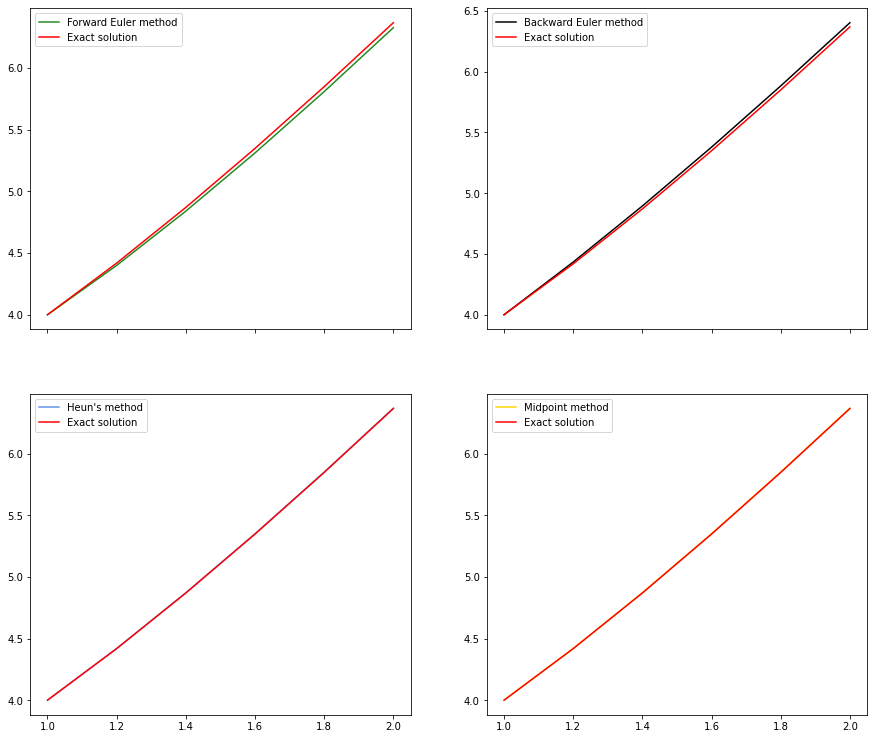

In [8]:
h1 = 0.2
x1 = np.array([1, 2])
yinitf = np.array([4.0])
yinitb = np.array([4.0])
yinith = np.array([4.0])
yinitm = np.array([4.0])

[tf1, yf1] = forwardEuler(f=example1, yinit=yinitf, x_range=x1, h=h1)
[tb1, yb1] = backwardEuler(f=example1, yinit=yinitb, x_range=x1, h=h1)
[th1, yh1] = HeunsMethod(f=example1, yinit=yinith, x_range=x1, h=h1)
[tm1, ym1] = midpoint(f=example1, yinit=yinitm, x_range=x1, h=h1)
[te1, ye1] = exact_sol_example1(x=x1, h=h1)

fig, ax = plt.subplots(nrows=2, ncols=2, sharex='col', figsize=(15,13))

ax[0,0].plot(tf1, yf1, c='forestgreen', label="Forward Euler method")
ax[0,0].plot(te1, ye1, c='r', label="Exact solution")
ax[0,0].legend(loc=2)
ax[0,1].plot(tb1, yb1, c='black', label="Backward Euler method")
ax[0,1].plot(te1, ye1, c='r', label="Exact solution")
ax[0,1].legend(loc=2)
ax[1,0].plot(th1, yh1, c='cornflowerblue', label="Heun's method")
ax[1,0].plot(te1, ye1, c='r', label="Exact solution")
ax[1,0].legend(loc=2)
ax[1,1].plot(tm1, ym1, c='gold', label="Midpoint method")
ax[1,1].plot(te1, ye1, c='r', label="Exact solution")
ax[1,1].legend(loc=2)
plt.show()

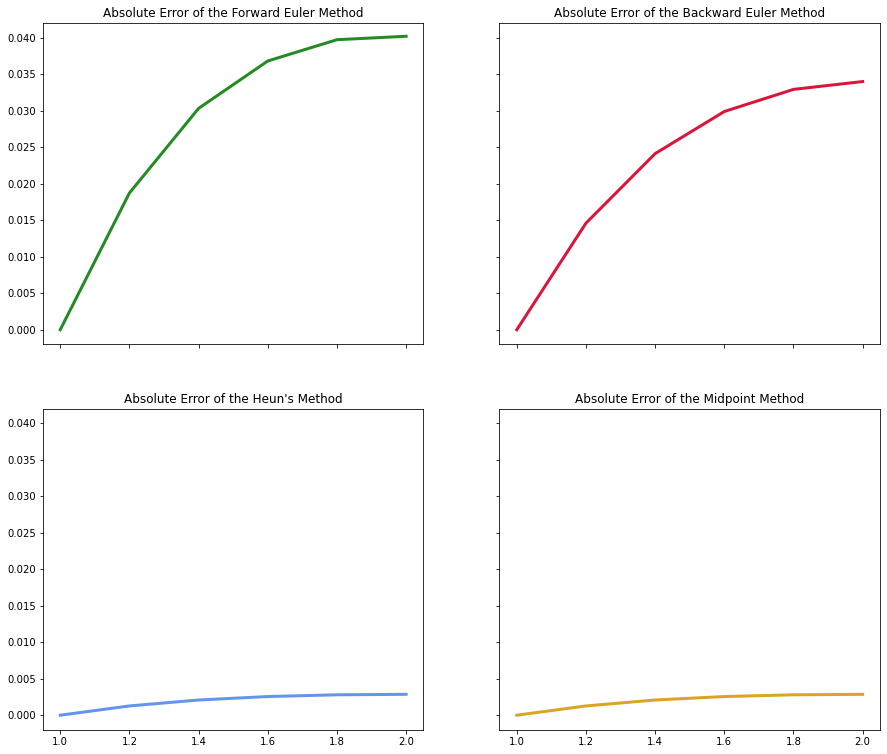

In [9]:
err_f1 = np.abs(ye1 - yf1) 
err_b1 = np.abs(ye1 - yb1)
err_h1 = np.abs(ye1 - yh1)
err_m1 = np.abs(ye1 - ym1)

fig, ax = plt.subplots(nrows=2, ncols=2, sharex='col', sharey='row', figsize=(15,13))

ax[0,0].plot(tf1, err_f1, c='forestgreen', lw=3)
ax[0,0].set_title("Absolute Error of the Forward Euler Method")
ax[0,0].set_ylim([-0.002, 0.042]) 
ax[0,1].plot(tb1, err_b1, c='crimson', lw=3)
ax[0,1].set_title("Absolute Error of the Backward Euler Method")
ax[0,1].set_ylim([-0.002, 0.042])
ax[1,0].plot(th1, err_h1, c='cornflowerblue', lw=3)
ax[1,0].set_title("Absolute Error of the Heun's Method")
ax[1,0].set_ylim([-0.002, 0.042])
ax[1,1].plot(tm1, err_m1, c='goldenrod', lw=3)
ax[1,1].set_title("Absolute Error of the Midpoint Method")
ax[1,1].set_ylim([-0.002, 0.042])
plt.show()

The error will be smaller if we reduce the step size $h$.

### Example 2

Solve the following ODE,

\begin{equation*}
\frac{1}{x} \frac{dy}{dx} + 4y = 2
\label{eq:exampleProblem2} \tag{13}
\end{equation*}

given the initial condition $y(0)=4.0$ on the interval $0\leq{}x\leq{}2$ with $h=0.1$. Use all numerical methods above.

### Solution

The ODE in Equation (13) is rearranged to get

\begin{equation*}
\frac{dy}{dx} = 2x - 4xy
\label{eq:exampleProblem2New} \tag{14}
\end{equation*}

and coded in the following function, which we name it `example2`:

In [10]:
def example2(x, y):
    dy = np.zeros((len(y)))
    dy[0] = 2 * x - 4 * x * y[0]
    return dy

The exact solution is

\begin{equation*}
y = 0.5(1 + 7e^{-2x^2})
\end{equation*}

In [11]:
def exact_sol_example2(x, h):
    dt = int((x[-1] - x[0]) / h)
    t = [x[0]+i*h for i in range(dt+1)]
    yexact = []
    for i in range(dt+1):
        ye = 0.5 * (1 + 7 * np.exp(-2*t[i]**2))
        yexact.append(ye)
    return t, yexact

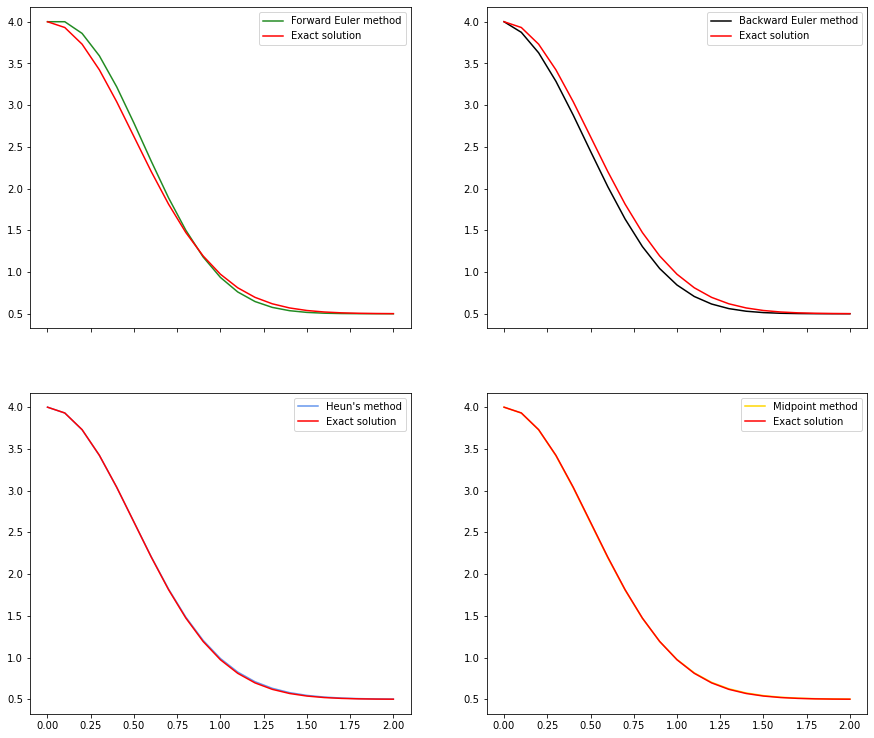

In [12]:
h2 = 0.1
x2 = np.array([0, 2])
yinitf = np.array([4.0])
yinitb = np.array([4.0])
yinith = np.array([4.0])
yinitm = np.array([4.0])

[tf2, yf2] = forwardEuler(f=example2, yinit=yinitf, x_range=x2, h=h2)
[tb2, yb2] = backwardEuler(f=example2, yinit=yinitb, x_range=x2, h=h2)
[th2, yh2] = HeunsMethod(f=example2, yinit=yinith, x_range=x2, h=h2)
[tm2, ym2] = midpoint(f=example2, yinit=yinitm, x_range=x2, h=h2)
[te2, ye2] = exact_sol_example2(x=x2, h=h2)

fig, ax = plt.subplots(nrows=2, ncols=2, sharex='col', figsize=(15,13))

ax[0,0].plot(tf2, yf2, c='forestgreen', label="Forward Euler method")
ax[0,0].plot(te2, ye2, c='r', label="Exact solution")
ax[0,0].legend(loc=1)
ax[0,1].plot(tb2, yb2, c='black', label="Backward Euler method")
ax[0,1].plot(te2, ye2, c='r', label="Exact solution")
ax[0,1].legend(loc=1)
ax[1,0].plot(th2, yh2, c='cornflowerblue', label="Heun's method")
ax[1,0].plot(te2, ye2, c='r', label="Exact solution")
ax[1,0].legend(loc=1)
ax[1,1].plot(tm2, ym2, c='gold', label="Midpoint method")
ax[1,1].plot(te2, ye2, c='r', label="Exact solution")
ax[1,1].legend(loc=1)
plt.show()

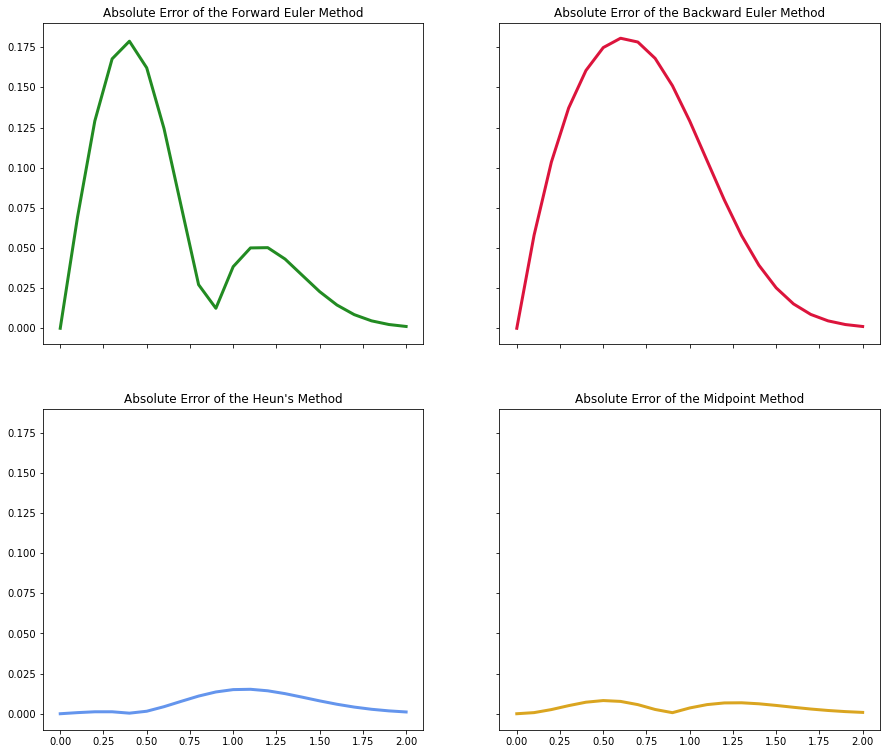

In [13]:
err_f2 = np.abs(ye2 - yf2) 
err_b2 = np.abs(ye2 - yb2)
err_h2 = np.abs(ye2 - yh2)
err_m2 = np.abs(ye2 - ym2)

fig, ax = plt.subplots(nrows=2, ncols=2, sharex='col', sharey='row', figsize=(15,13))

ax[0,0].plot(tf2, err_f2, c='forestgreen', lw=3)
ax[0,0].set_title("Absolute Error of the Forward Euler Method")
ax[0,0].set_ylim([-0.01, 0.19]) 
ax[0,1].plot(tb2, err_b2, c='crimson', lw=3)
ax[0,1].set_title("Absolute Error of the Backward Euler Method")
ax[0,1].set_ylim([-0.01, 0.19]) 
ax[1,0].plot(th2, err_h2, c='cornflowerblue', lw=3)
ax[1,0].set_title("Absolute Error of the Heun's Method")
ax[1,0].set_ylim([-0.01, 0.19]) 
ax[1,1].plot(tm2, err_m2, c='goldenrod', lw=3)
ax[1,1].set_title("Absolute Error of the Midpoint Method")
ax[1,1].set_ylim([-0.01, 0.19]) 
plt.show()

### Example 3

Solve the following ODE,

\begin{equation*}
\frac{dy}{dx} = \frac{x-y}{2}
\label{eq:exampleProblem2} \tag{15}
\end{equation*}

given the initial condition $y(0)=1.0$ on the interval $0\leq{}x\leq{}3$ with $h=0.05$. Use all numerical methods above.

In [14]:
def example3(x, y):
    dy = np.zeros((len(y)))
    dy[0] = (x - y[0]) / 2
    return dy

The exact solution is

\begin{equation*}
y = x - 2 + 3e^{-0.5x}
\end{equation*}

In [15]:
def exact_sol_example3(x, h):
    dt = int((x[-1] - x[0]) / h)
    t = [x[0]+i*h for i in range(dt+1)]
    yexact = []
    for i in range(dt+1):
        ye = t[i] - 2 + 3*np.exp(-0.5*t[i])
        yexact.append(ye)
    return t, yexact

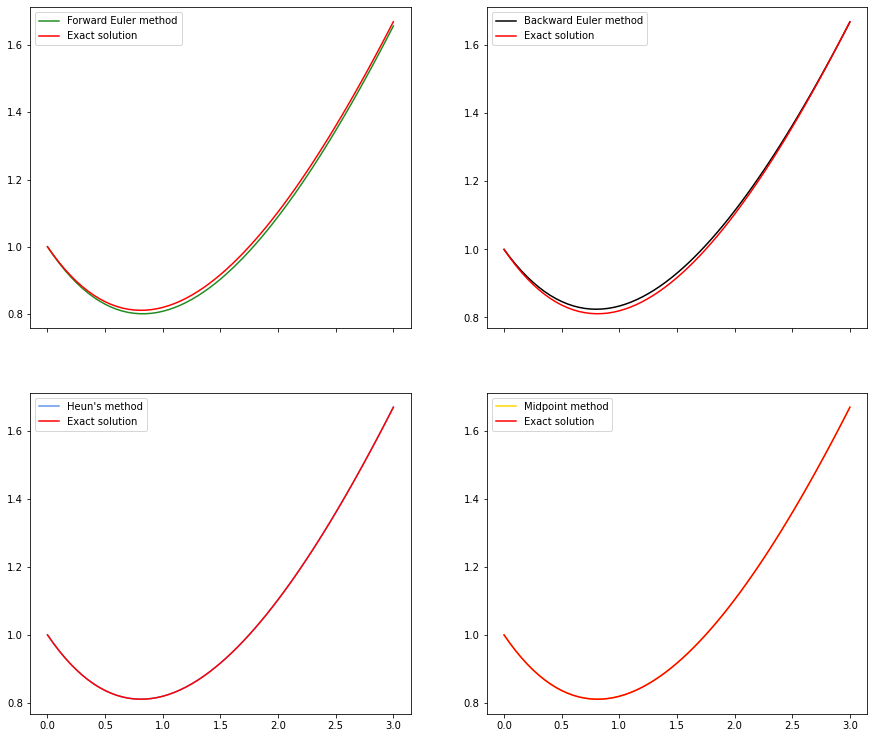

In [16]:
h3 = 0.05
x3 = np.array([0, 3])
yinitf = np.array([1.0])
yinitb = np.array([1.0])
yinith = np.array([1.0])
yinitm = np.array([1.0])

[tf3, yf3] = forwardEuler(f=example3, yinit=yinitf, x_range=x3, h=h3)
[tb3, yb3] = backwardEuler(f=example3, yinit=yinitb, x_range=x3, h=h3)
[th3, yh3] = HeunsMethod(f=example3, yinit=yinith, x_range=x3, h=h3)
[tm3, ym3] = midpoint(f=example3, yinit=yinitm, x_range=x3, h=h3)
[te3, ye3] = exact_sol_example3(x=x3, h=h3)

fig, ax = plt.subplots(nrows=2, ncols=2, sharex='col', figsize=(15,13))

ax[0,0].plot(tf3, yf3, c='forestgreen', label="Forward Euler method")
ax[0,0].plot(te3, ye3, c='r', label="Exact solution")
ax[0,0].legend(loc=2)
ax[0,1].plot(tb3, yb3, c='black', label="Backward Euler method")
ax[0,1].plot(te3, ye3, c='r', label="Exact solution")
ax[0,1].legend(loc=2)
ax[1,0].plot(th3, yh3, c='cornflowerblue', label="Heun's method")
ax[1,0].plot(te3, ye3, c='r', label="Exact solution")
ax[1,0].legend(loc=2)
ax[1,1].plot(tm3, ym3, c='gold', label="Midpoint method")
ax[1,1].plot(te3, ye3, c='r', label="Exact solution")
ax[1,1].legend(loc=2)
plt.show()

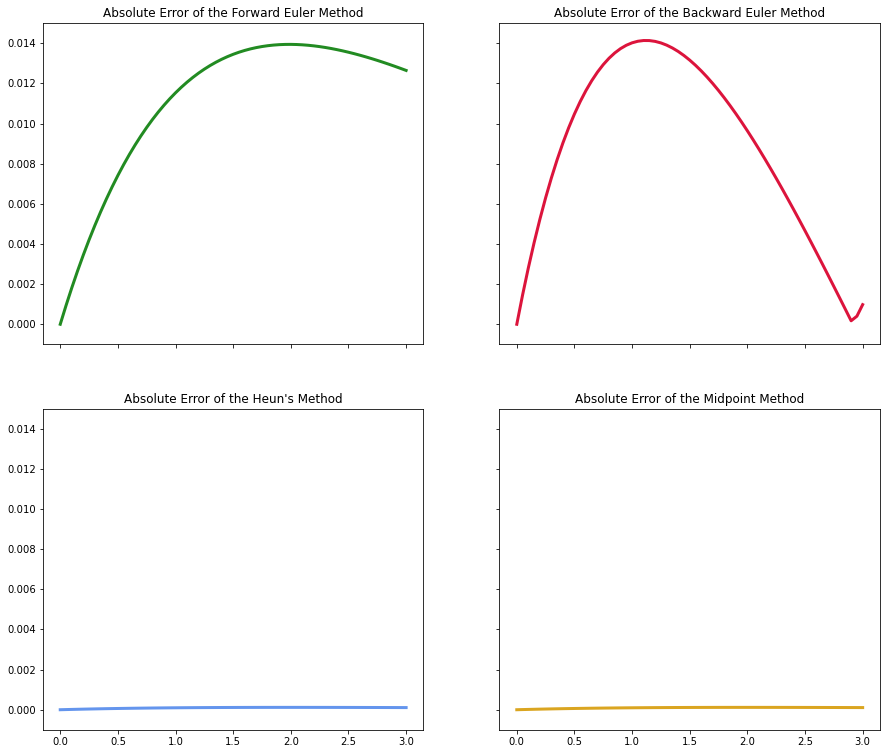

In [17]:
err_f3 = np.abs(ye3 - yf3) 
err_b3 = np.abs(ye3 - yb3)
err_h3 = np.abs(ye3 - yh3)
err_m3 = np.abs(ye3 - ym3)

fig, ax = plt.subplots(nrows=2, ncols=2, sharex='col', sharey='row', figsize=(15,13))

ax[0,0].plot(tf3, err_f3, c='forestgreen', lw=3)
ax[0,0].set_title("Absolute Error of the Forward Euler Method")
ax[0,0].set_ylim([-0.001, 0.015]) 
ax[0,1].plot(tb3, err_b3, c='crimson', lw=3)
ax[0,1].set_title("Absolute Error of the Backward Euler Method")
ax[0,1].set_ylim([-0.001, 0.015]) 
ax[1,0].plot(th3, err_h3, c='cornflowerblue', lw=3)
ax[1,0].set_title("Absolute Error of the Heun's Method")
ax[1,0].set_ylim([-0.001, 0.015]) 
ax[1,1].plot(tm3, err_m3, c='goldenrod', lw=3)
ax[1,1].set_title("Absolute Error of the Midpoint Method")
ax[1,1].set_ylim([-0.001, 0.015]) 
plt.show()